### Actividad 3.1

### **Instrucciones**

Resuelva cuidadosamente cada uno de los siguientes ejercicios.
Justifique sus respuestas y, cuando corresponda, incluya simulaciones o gráficas de apoyo.

In [16]:
import numpy as np

rng = np.random.default_rng(2025)


### **Ejercicio 1**

Elabore un programa de cómputo para aproximar la integral θ que aparece abajo usando **muestreo por importancia**.
Utilice como función de densidad las funciones *f(x)* indicadas en los incisos.
$$
\theta = \int_{0}^{\pi/2} \sin^2(x),dx
$$

In [17]:
n = 100_000
pi = np.pi

# Valor verdadero para comparar
theta_true = pi/4

**(a)**  $ f(x) = \dfrac{2}{\pi} $,  si $ 0 < x < \dfrac{\pi}{2} $

In [ ]:
X_u = rng.uniform(0.0, pi/2, size=n)
w_u = (pi/2) * (np.sin(X_u)**2)              # g(X)/f(X)
theta_u = w_u.mean()
se_u = w_u.std(ddof=1)/np.sqrt(n)            # error estándar empírico

print(f"Verdadero θ = {theta_true:.6f}")
print(f"θ̂ = {theta_u:.6f}  ± {1.96*se_u:.6f} (IC 95%)")

Verdadero θ = 0.785398
θ̂ = 0.781367  ± 0.003442 (IC 95%)


**(b)**  $ f(x) = \dfrac{8x}{\pi^2} $,  si $ 0 < x < \dfrac{\pi}{2} $

In [19]:
U = rng.uniform(0.0, 1.0, size=n)
X_t = (pi/2)*np.sqrt(U)
w_t = (pi**2/8.0) * (np.sin(X_t)**2) / X_t   # g(X)/f(X)
theta_t = w_t.mean()
se_t = w_t.std(ddof=1)/np.sqrt(n)

print(f"Verdadero θ = {theta_true:.6f}")
print(f"θ̂ = {theta_t:.6f}  ± {1.96*se_t:.6f} (IC 95%)")

Verdadero θ = 0.785398
θ̂ = 0.785619  ± 0.000958 (IC 95%)


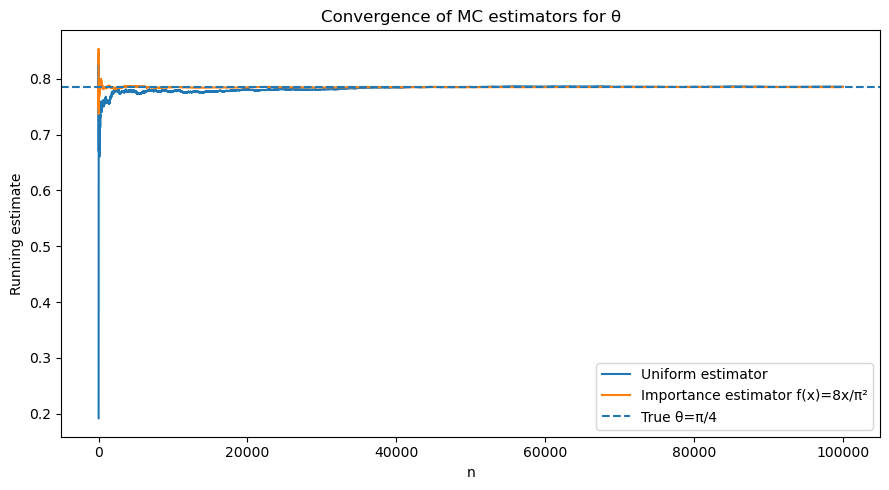

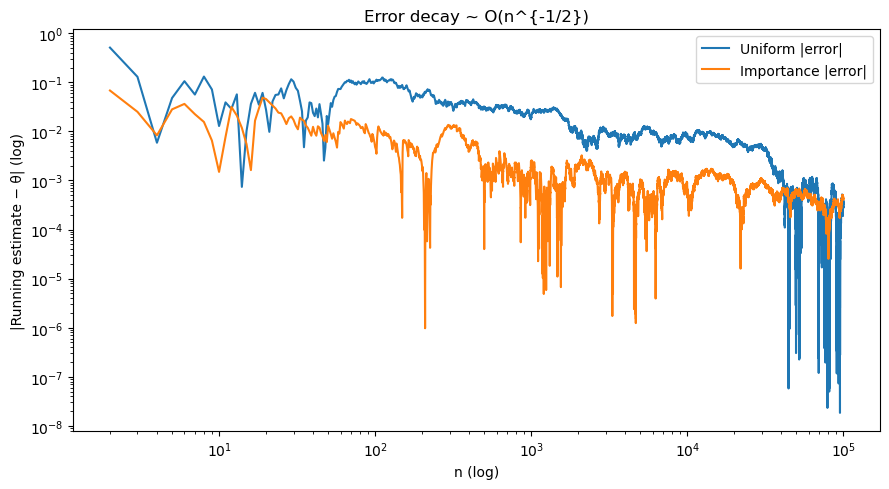

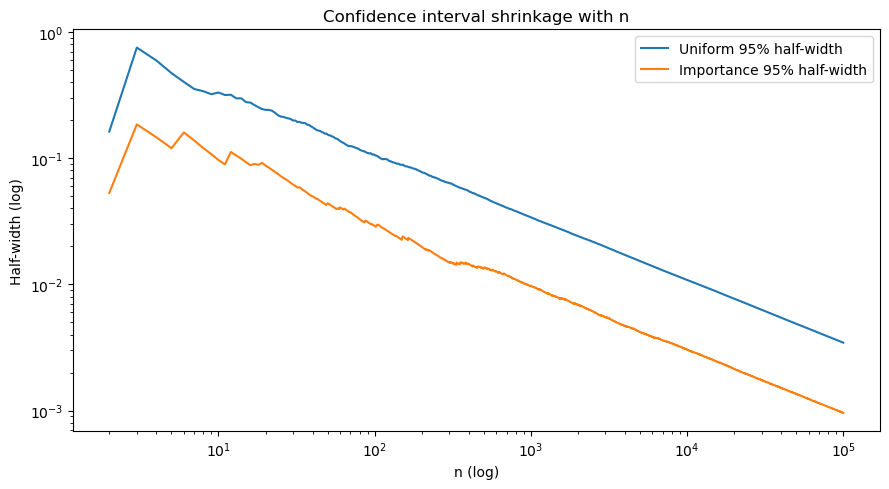

True θ = 0.7853981634
Final (n=100000)  Uniform:     mean=0.7856867954,  95%±=0.0034490439,  |err|=2.886e-04
Final (n=100000)  Importance:  mean=0.7849860999,  95%±=0.0009578850,  |err|=4.121e-04
Per-draw variance:  Var[w]_uniform=0.309660,  Var[w]_importance=0.023884
Efficiency gain ≈ Var_u / Var_t = 12.96×  (values >1 favor importance sampling)


In [20]:
# Convergence of two Monte Carlo estimators for θ = ∫_{0}^{π/2} sin^2(x) dx = π/4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt, pi

# Reproducibility
rng = np.random.default_rng(12345)

# Problem setup
n = 100_000
theta_true = pi/4

# (a) Uniform on (0, π/2)
Xu = rng.uniform(0.0, pi/2, size=n)
wu = (pi/2) * (np.sin(Xu)**2)  # g(X)/f(X) with f(x)=2/π

# (b) Importance density f(x)=8x/π^2 on (0, π/2); inverse: X=(π/2)*sqrt(U)
U = rng.uniform(0.0, 1.0, size=n)
Xt = (pi/2)*np.sqrt(U)
wt = (pi**2/8.0) * (np.sin(Xt)**2) / Xt

# Running means and SEs
k = np.arange(1, n+1)

def running_mean_and_se(w):
    c1 = np.cumsum(w)
    c2 = np.cumsum(w*w)
    mean = c1 / k
    # Unbiased running variance; first SE undefined -> set to NaN
    var = np.empty_like(mean)
    var[0] = np.nan
    var[1:] = (c2[1:] - (c1[1:]**2)/k[1:]) / (k[1:] - 1)
    se = np.sqrt(var) / np.sqrt(k)
    return mean, se

mean_u, se_u = running_mean_and_se(wu)
mean_t, se_t = running_mean_and_se(wt)

# Summary table at milestones
milestones = np.array([100, 1_000, 10_000, 100_000])
summary = pd.DataFrame({
    "n": milestones,
    "mean_uniform": mean_u[milestones-1],
    "CI95_half_uniform": 1.96*se_u[milestones-1],
    "abs_err_uniform": np.abs(mean_u[milestones-1] - theta_true),
    "mean_importance": mean_t[milestones-1],
    "CI95_half_importance": 1.96*se_t[milestones-1],
    "abs_err_importance": np.abs(mean_t[milestones-1] - theta_true),
}).set_index("n")

# Efficiency comparison (per-draw variance of weights)
var_u = np.var(wu, ddof=1)
var_t = np.var(wt, ddof=1)
eff_ratio = var_u / var_t  # >1 means importance sampler is that many times more efficient


# Plot 1: Running estimates vs n with true value
plt.figure(figsize=(9,5))
plt.plot(k, mean_u, label="Uniform estimator")
plt.plot(k, mean_t, label="Importance estimator f(x)=8x/π²")
plt.axhline(theta_true, linestyle="--", label="True θ=π/4")
plt.xlabel("n")
plt.ylabel("Running estimate")
plt.title("Convergence of MC estimators for θ")
plt.legend()
plt.tight_layout()
plt.show()

# Plot 2: Absolute error vs n (log-log)
plt.figure(figsize=(9,5))
abs_err_u = np.abs(mean_u - theta_true)
abs_err_t = np.abs(mean_t - theta_true)
plt.loglog(k[1:], abs_err_u[1:], label="Uniform |error|")
plt.loglog(k[1:], abs_err_t[1:], label="Importance |error|")
plt.xlabel("n (log)")
plt.ylabel("|Running estimate − θ| (log)")
plt.title("Error decay ~ O(n^{-1/2})")
plt.legend()
plt.tight_layout()
plt.show()

# Plot 3: Estimated 95% CI half-width vs n (log-log)
plt.figure(figsize=(9,5))
plt.loglog(k[1:], 1.96*se_u[1:], label="Uniform 95% half-width")
plt.loglog(k[1:], 1.96*se_t[1:], label="Importance 95% half-width")
plt.xlabel("n (log)")
plt.ylabel("Half-width (log)")
plt.title("Confidence interval shrinkage with n")
plt.legend()
plt.tight_layout()
plt.show()

# Print compact efficiency stats
print(f"True θ = {theta_true:.10f}")
print(f"Final (n={n})  Uniform:     mean={mean_u[-1]:.10f},  95%±={1.96*se_u[-1]:.10f},  |err|={abs_err_u[-1]:.3e}")
print(f"Final (n={n})  Importance:  mean={mean_t[-1]:.10f},  95%±={1.96*se_t[-1]:.10f},  |err|={abs_err_t[-1]:.3e}")
print(f"Per-draw variance:  Var[w]_uniform={var_u:.6f},  Var[w]_importance={var_t:.6f}")
print(f"Efficiency gain ≈ Var_u / Var_t = {eff_ratio:.2f}×  (values >1 favor importance sampling)")


### **Ejercicio 2**

Sea $(X, Y)$ un vector aleatorio con distribución $ \text{Unif}(-1, 1) \times \text{Unif}(-1, 1) $.
Use **muestreo condicional** para encontrar una aproximación a las probabilidades que aparecen abajo.
Calcule el valor exacto de estas probabilidades y compruebe si las aproximaciones obtenidas son razonables.



**(a)**  $ \Pr(X + Y > 0) $

**(b)**  $ \Pr(X - Y > 0) $

**(c)**  $ \Pr(2X + Y < 0) $


### Geometría

Cada evento es un semiplano acotado por una recta que pasa por el origen $(0,0)$: $X+Y>0$, $X-Y>0$, $2X+Y<0$. El cuadrado $[-1,1]^2$ es centralmente simétrico. Cualquier recta que pase por su centro bisecciona el área. Por lo tanto, la probabilidad (área relativa) es (1/2) en los tres casos.

### Alternativa condicional (cálculo explícito)
$$
\text{(a)}\quad \mathbb{P}(X+Y>0\mid Y)=\mathbb{P}(X>-Y\mid Y)=1-F_X(-Y)=\tfrac{Y+1}{2};\Rightarrow\mathbb{E}\Big[\tfrac{Y+1}{2}\Big]=\tfrac12,
$$
$$
\text{(b)}\quad \mathbb{P}(X-Y>0\mid Y)=\mathbb{P}(X>Y\mid Y)=1-F_X(Y)=\tfrac{1-Y}{2};\Rightarrow\mathbb{E}\Big[\tfrac{1-Y}{2}\Big]=\tfrac12,
$$
$$
\text{(c)}\quad \mathbb{P}(2X+Y<0\mid Y)=\mathbb{P}(X<-Y/2\mid Y)=F_X(-Y/2)=\tfrac{1-\tfrac{Y}{2}}{2}\Rightarrow\mathbb{E}\Big[\tfrac{1-\tfrac{Y}{2}}{2}\Big]=\tfrac12,
$$
pues $\mathbb{E}[Y]=0$.
$$
\boxed{;\mathbb{P}(X+Y>0)=\mathbb{P}(X-Y>0)=\mathbb{P}(2X+Y<0)=\tfrac12;}
$$


In [21]:
n = 200_000

# Simulación cruda
X = rng.uniform(-1, 1, size=n)
Y = rng.uniform(-1, 1, size=n)

In [22]:
# (a) X+Y>0
theta_a_crudo = np.mean(X + Y > 0)
theta_a_cond  = np.mean((Y + 1)/2)  # E[1_{X>-Y} | Y] = 1 - F_X(-Y) = (Y+1)/2
se_a_crudo = np.sqrt(theta_a_crudo*(1-theta_a_crudo)/n)
se_a_cond  = np.std((Y + 1)/2, ddof=1)/np.sqrt(n)

print(f"Crudo:        {theta_a_crudo:.5f}  ± {1.96*se_a_crudo:.5f}")
print(f"Condicional:  {theta_a_cond:.5f}  ± {1.96*se_a_cond:.5f}")

Crudo:        0.49933  ± 0.00219
Condicional:  0.49925  ± 0.00127


In [23]:
# (b) X>Y
theta_b_crudo = np.mean(X > Y)
theta_b_cond  = np.mean((1 - Y)/2)
se_b_crudo = np.sqrt(theta_b_crudo*(1-theta_b_crudo)/n)
se_b_cond  = np.std((1 - Y)/2, ddof=1)/np.sqrt(n)

print(f"Crudo:        {theta_b_crudo:.5f}  ± {1.96*se_b_crudo:.5f}")
print(f"Condicional:  {theta_b_cond:.5f}  ± {1.96*se_b_cond:.5f}")


Crudo:        0.50050  ± 0.00219
Condicional:  0.50075  ± 0.00127


In [24]:
# (c) 2X+Y<0  <=>  X < -Y/2
theta_c_crudo = np.mean(2*X + Y < 0)
theta_c_cond  = np.mean( ( -Y/2 + 1 )/2 )
se_c_crudo = np.sqrt(theta_c_crudo*(1-theta_c_crudo)/n)
se_c_cond  = np.std(( -Y/2 + 1 )/2, ddof=1)/np.sqrt(n)

print(f"Crudo:        {theta_c_crudo:.5f}  ± {1.96*se_c_crudo:.5f}")
print(f"Condicional:  {theta_c_cond:.5f}  ± {1.96*se_c_cond:.5f}")

Crudo:        0.50047  ± 0.00219
Condicional:  0.50037  ± 0.00063


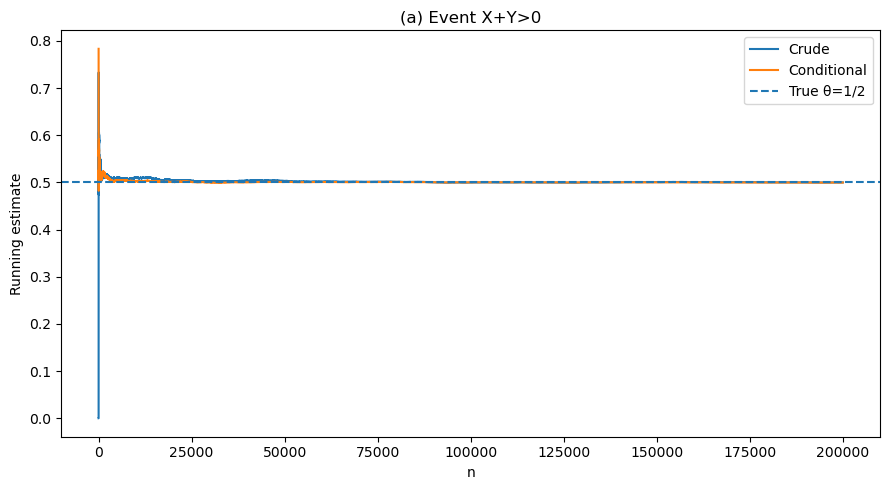

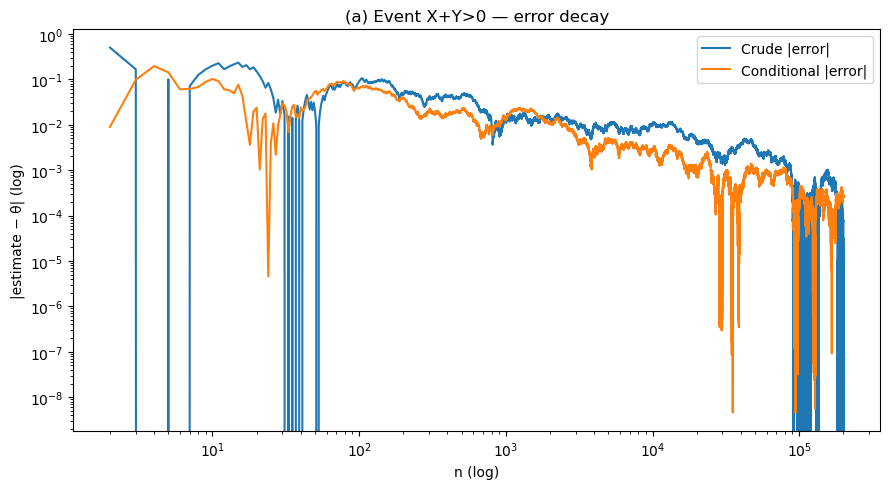

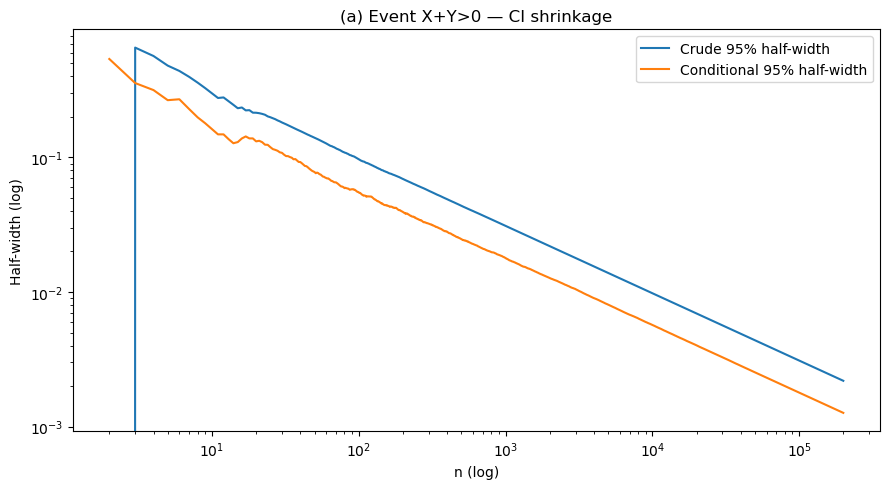

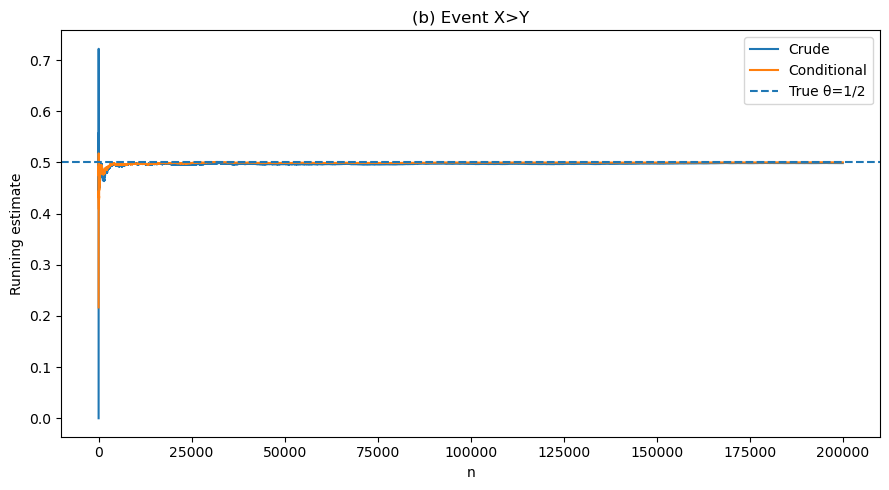

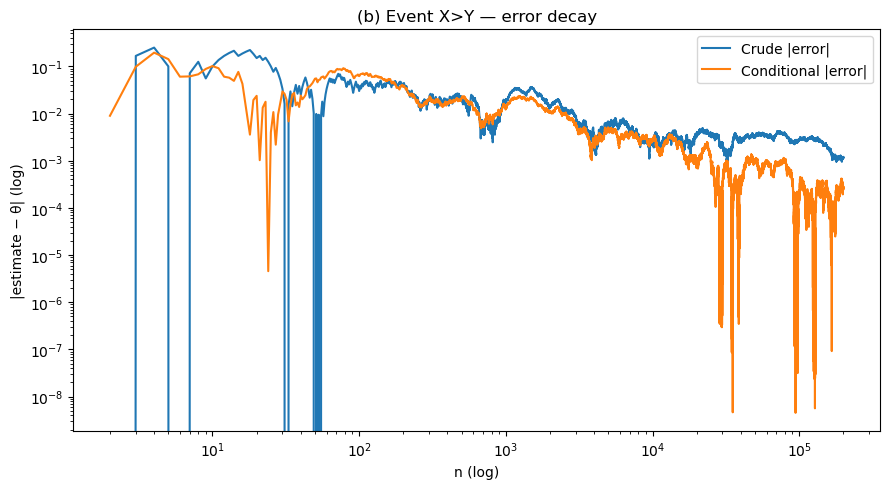

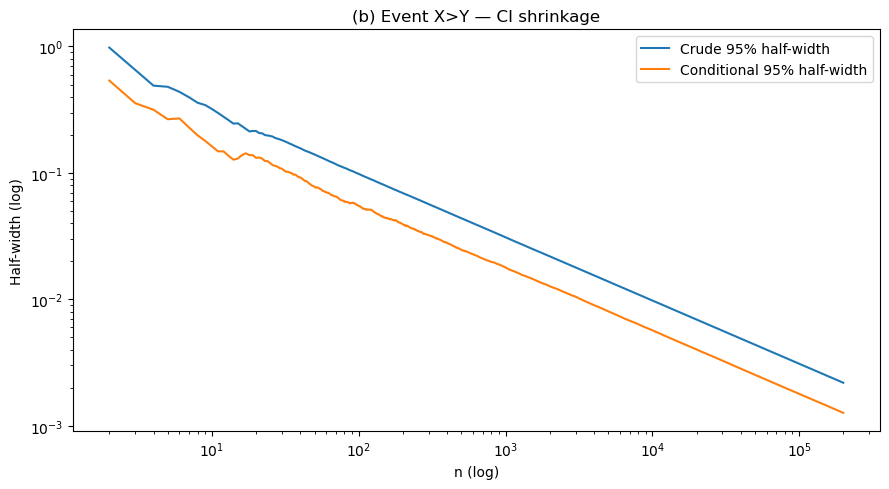

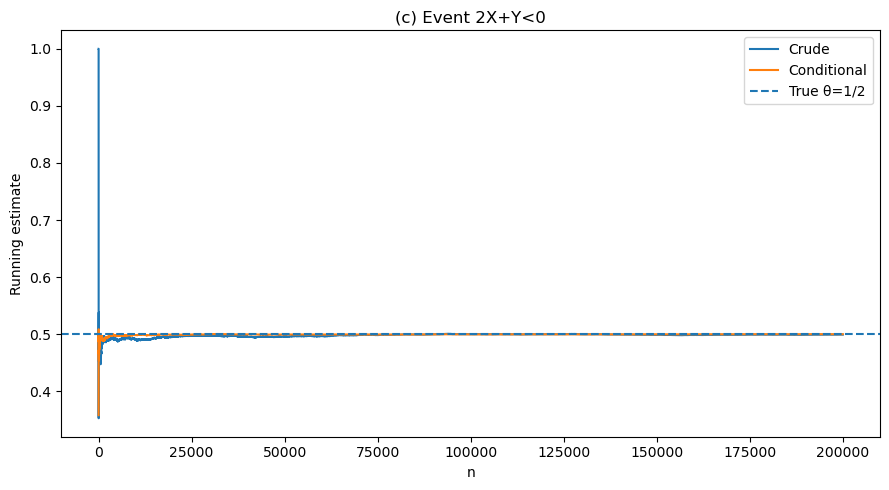

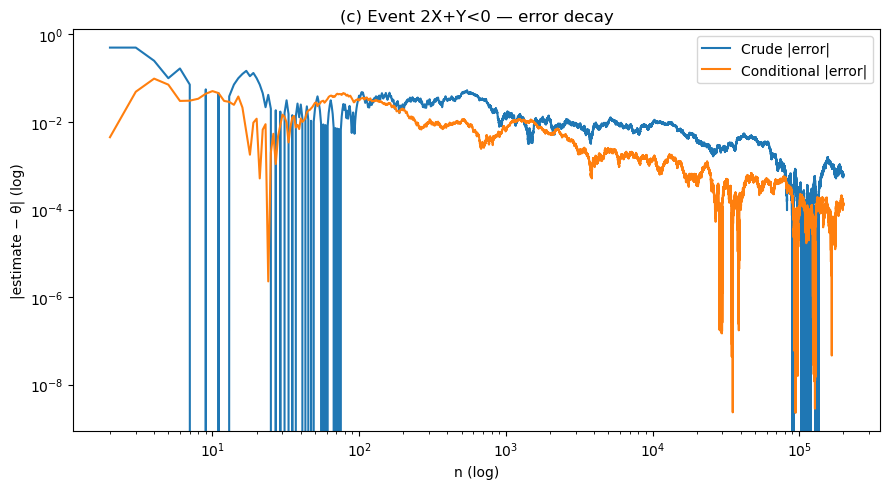

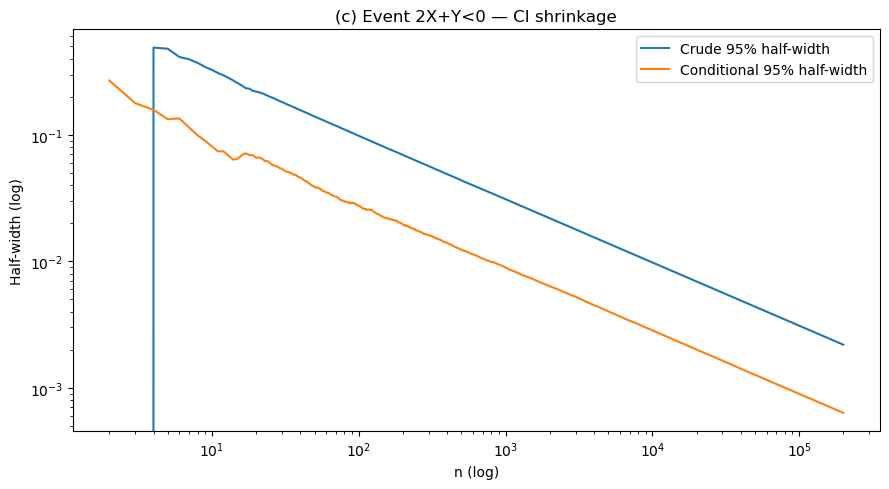

True θ for (a),(b),(c) = 0.5
(a) Var ratio crude/cond ≈ 2.99×   [theory: 3×]
(b) Var ratio crude/cond ≈ 2.99×   [theory: 3×]
(c) Var ratio crude/cond ≈ 11.98×   [theory: 12×]
Final n=200000: crude means = 0.500075, 0.498825, 0.499355
Final n=200000: cond  means = 0.499756, 0.500244, 0.500122


In [9]:
# Convergence study: crude vs conditional Monte Carlo for events with X,Y ~ i.i.d. Uniform(-1,1)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

# Reproducibility
rng = np.random.default_rng(20251014)

n = 200_000
theta_true = 0.5  # all three probabilities equal 1/2 by symmetry and conditioning

# Simulate
X = rng.uniform(-1, 1, size=n)
Y = rng.uniform(-1, 1, size=n)

# Indicators (crude)
Ia = (X + Y > 0).astype(float)       # (a) X+Y>0
Ib = (X > Y).astype(float)           # (b) X>Y
Ic = (2*X + Y < 0).astype(float)     # (c) 2X+Y<0

# Conditional control variates (functions of Y only)
ma = (Y + 1)/2                       # E[1_{X>-Y}|Y] = (Y+1)/2
mb = (1 - Y)/2                       # E[1_{X>Y}|Y] = (1-Y)/2
mc = ( -Y/2 + 1 )/2                  # E[1_{X<-Y/2}|Y] = (1 - Y/2)/2

k = np.arange(1, n+1)

def running_mean_and_se(w):
    # running mean and unbiased SE
    c1 = np.cumsum(w)
    c2 = np.cumsum(w*w)
    mean = c1 / k
    var = np.empty_like(mean)
    var[0] = np.nan
    var[1:] = (c2[1:] - (c1[1:]**2)/k[1:]) / (k[1:] - 1)
    se = np.sqrt(var) / np.sqrt(k)
    return mean, se

# Compute running stats
mean_Ia, se_Ia = running_mean_and_se(Ia)
mean_ma, se_ma = running_mean_and_se(ma)

mean_Ib, se_Ib = running_mean_and_se(Ib)
mean_mb, se_mb = running_mean_and_se(mb)

mean_Ic, se_Ic = running_mean_and_se(Ic)
mean_mc, se_mc = running_mean_and_se(mc)

# Milestones
milestones = np.array([100, 1_000, 10_000, 200_000])

def make_summary(tag, mean_crude, se_crude, mean_cond, se_cond):
    df = pd.DataFrame({
        "n": milestones,
        f"{tag}_mean_crude": mean_crude[milestones-1],
        f"{tag}_CI95_crude": 1.96*se_crude[milestones-1],
        f"{tag}_abs_err_crude": np.abs(mean_crude[milestones-1]-theta_true),
        f"{tag}_mean_cond": mean_cond[milestones-1],
        f"{tag}_CI95_cond": 1.96*se_cond[milestones-1],
        f"{tag}_abs_err_cond": np.abs(mean_cond[milestones-1]-theta_true),
    }).set_index("n")
    return df

sum_a = make_summary("A", mean_Ia, se_Ia, mean_ma, se_ma)
sum_b = make_summary("B", mean_Ib, se_Ib, mean_mb, se_mb)
sum_c = make_summary("C", mean_Ic, se_Ic, mean_mc, se_mc)

summary = pd.concat([sum_a, sum_b, sum_c], axis=1)


# Efficiency ratios using per-draw sample variances
var_Ia = np.var(Ia, ddof=1); var_ma = np.var(ma, ddof=1); eff_a = var_Ia/var_ma
var_Ib = np.var(Ib, ddof=1); var_mb = np.var(mb, ddof=1); eff_b = var_Ib/var_mb
var_Ic = np.var(Ic, ddof=1); var_mc = np.var(mc, ddof=1); eff_c = var_Ic/var_mc

# Plotters
def plot_running(me_crude, me_cond, title):
    plt.figure(figsize=(9,5))
    plt.plot(k, me_crude, label="Crude")
    plt.plot(k, me_cond, label="Conditional")
    plt.axhline(theta_true, linestyle="--", label="True θ=1/2")
    plt.xlabel("n")
    plt.ylabel("Running estimate")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_error(me_crude, me_cond, title):
    plt.figure(figsize=(9,5))
    plt.loglog(k[1:], np.abs(me_crude[1:]-theta_true), label="Crude |error|")
    plt.loglog(k[1:], np.abs(me_cond[1:]-theta_true), label="Conditional |error|")
    plt.xlabel("n (log)")
    plt.ylabel("|estimate − θ| (log)")
    plt.title(title + " — error decay")
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_ci(se_crude, se_cond, title):
    plt.figure(figsize=(9,5))
    plt.loglog(k[1:], 1.96*se_crude[1:], label="Crude 95% half-width")
    plt.loglog(k[1:], 1.96*se_cond[1:], label="Conditional 95% half-width")
    plt.xlabel("n (log)")
    plt.ylabel("Half-width (log)")
    plt.title(title + " — CI shrinkage")
    plt.legend()
    plt.tight_layout()
    plt.show()

# (a)
plot_running(mean_Ia, mean_ma, "(a) Event X+Y>0")
plot_error(mean_Ia, mean_ma, "(a) Event X+Y>0")
plot_ci(se_Ia, se_ma, "(a) Event X+Y>0")

# (b)
plot_running(mean_Ib, mean_mb, "(b) Event X>Y")
plot_error(mean_Ib, mean_mb, "(b) Event X>Y")
plot_ci(se_Ib, se_mb, "(b) Event X>Y")

# (c)
plot_running(mean_Ic, mean_mc, "(c) Event 2X+Y<0")
plot_error(mean_Ic, mean_mc, "(c) Event 2X+Y<0")
plot_ci(se_Ic, se_mc, "(c) Event 2X+Y<0")

# Print compact efficiency report
print("True θ for (a),(b),(c) = 0.5")
print(f"(a) Var ratio crude/cond ≈ {eff_a:.2f}×   [theory: 3×]")
print(f"(b) Var ratio crude/cond ≈ {eff_b:.2f}×   [theory: 3×]")
print(f"(c) Var ratio crude/cond ≈ {eff_c:.2f}×   [theory: 12×]")
print(f"Final n={n}: crude means = {mean_Ia[-1]:.6f}, {mean_Ib[-1]:.6f}, {mean_Ic[-1]:.6f}")
print(f"Final n={n}: cond  means = {mean_ma[-1]:.6f}, {mean_mb[-1]:.6f}, {mean_mc[-1]:.6f}")
